# 0 - Library import and prior configurations

In [400]:
import pandas as pd
import numpy as np

In [401]:
# Visualisation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1. Introducción

## 1.1 Resumen del problema

Bienvenidos al año 2912, donde se necesitan sus habilidades en ciencia de datos para resolver un misterio cósmico. La Spaceship Titanic, un transatlántico interestelar, chocó con una anomalía espaciotemporal, lo que resultó en la desaparición de casi la mitad de sus pasajeros que fueron transportados a una dimensión alternativa. El desafío es predecir qué pasajeros fueron transportados utilizando los registros recuperados del sistema informático dañado de la nave.

Se trata de un problema de clasificación binaria que tiene como objetivo predecir si un pasajero ha sido transportado (True) o no (False). Por lo tanto, será útil considerar algoritmos de aprendizaje automático supervisado adecuados para tareas de clasificación.

## 1.2 Conjunto de Datos

El conjunto de datos para esta competición contiene registros personales de los pasajeros a bordo del Spaceship Titanic antes del desafortunado incidente con la anomalía espaciotemporal. Hay dos archivos principales:

- train.csv - Contiene registros personales para aproximadamente dos tercios (~8700) de los pasajeros, que se utilizarán como datos de entrenamiento. Los campos incluyen identificación de pasajero, planeta de origen, estado de sueño criogénico, número de cabina, planeta de destino, edad, estado de VIP, gastos en diversas instalaciones de lujo en la nave y, lo más importante, si el pasajero fue transportado a otra dimensión (nuestra variable objetivo).

- test.csv - Contiene registros personales para el tercio restante (~4300) de los pasajeros, que se utilizarán como datos de prueba. Los campos son los mismos que en el archivo de entrenamiento, excepto la variable objetivo de ser transportado.

Además, se proporciona un archivo sample_submission.csv para guiar a los competidores sobre cómo deben presentarse las predicciones.

### 1.2.1 Características del conjunto de Datos

- *PassengerId*: Este es un identificador único para cada pasajero. Se compone de dos partes: la primera parte indica el grupo con el que viaja el pasajero, y la segunda parte es su número dentro del grupo. Los miembros del mismo grupo a menudo son miembros de la misma familia, pero no siempre.

- *Cabin*: Este es el número de la cabina donde se aloja el pasajero. Se presenta en la forma cubierta/número/lado, donde el lado puede ser P para Puerto o S para Estribor. 
  
- *HomePlanet*: Este campo indica el planeta del que partió el pasajero, que generalmente es su planeta de residencia permanente. Son tres los planetas de partida como se verá posteiormente: 
  
  - Europa: Europa es una de las lunas más grandes de Júpiter, notable por su superficie lisa y helada. Debajo de esta capa de hielo, se cree que Europa tiene un océano de agua líquida. La superficie de Europa está marcada por una serie de líneas y grietas, lo que sugiere que la capa de hielo se ha fracturado y movido a lo largo del tiempo.

  - Tierra: La Tierra es el tercer planeta del Sol y es notable por su atmósfera rica en oxígeno y su clima templado. La Tierra tiene una variedad de ecosistemas y paisajes, incluyendo montañas, desiertos, bosques y océanos. Además, es el único planeta conocido que tiene agua líquida en su superficie.
  
  - Marte: Marte, a menudo llamado el "Planeta Rojo" debido a su color característico, es el cuarto planeta del Sol. Marte tiene una atmósfera delgada y su superficie está marcada por volcanes, valles, desiertos y capas de hielo polares. Marte es también el hogar del monte Olimpo, el volcán más grande del sistema solar.

- *Destination*: Este campo indica el planeta al que el pasajero iba a desembarcar.Son tres los destinos posibles desde los planetas de partida: 

  - TRAPPIST-1e: TRAPPIST-1e es uno de los siete planetas que orbitan la estrella enana ultrafría TRAPPIST-1, que se encuentra a unos 40 años luz de la Tierra. Es un poco más pequeño que la Tierra y se encuentra en la zona habitable de su estrella, lo que significa que las condiciones podrían permitir la existencia de agua líquida en su superficie. TRAPPIST-1e también tiene una densidad similar a la de la Tierra, lo que sugiere que podría ser un planeta rocoso.

  - PSO J318.5-22: PSO J318.5-22 es un objeto libre de masa planetaria, lo que significa que es un cuerpo del tamaño de un planeta pero que no orbita ninguna estrella. Se encuentra a unos 80 años luz de la Tierra. PSO J318.5-22 es muy joven en términos astronómicos, con una edad estimada de solo 12 millones de años. A pesar de su juventud, es aproximadamente del mismo tamaño que Júpiter.

  - 55 Cancri e: 55 Cancri e es un exoplaneta que orbita la estrella 55 Cancri A, que se encuentra a unos 41 años luz de la Tierra. Es notable por ser un "súper-Earth", un tipo de planeta con una masa mayor que la de la Tierra pero menor que la de los gigantes gaseosos de nuestro sistema solar. 55 Cancri e tiene una órbita muy cercana a su estrella y completa una órbita en solo 18 horas. Debido a su proximidad a su estrella, se cree que las temperaturas en la superficie de 55 Cancri e son extremadamente altas.

- *Age*: Este es la edad del pasajero.

- *CryoSleep*: Este campo indica si el pasajero optó por entrar en animación suspendida durante el viaje. Los pasajeros en sueño criogénico están confinados a sus cabinas.

- *VIP*: Este campo indica si el pasajero ha pagado por un servicio VIP especial durante el viaje.

- *RoomService, FoodCourt, ShoppingMall, Spa, VRDeck*: Estos campos representan la cantidad que el pasajero ha facturado en cada una de las numerosas comodidades de lujo del Spaceship Titanic.

- *Name*: Este es el nombre y apellido del pasajero.

- *Transported*: Este es el objetivo que estamos tratando de predecir. Indica si el pasajero fue transportado a otra dimensión.

## 1.3 Metodología

La metodología recomendada para abordar este problema es a través de un proceso iterativo, comenzando con el análisis exploratorio de datos (EDA) para entender la distribución de las características y su relación con la variable objetivo. Luego, se puede proceder a la limpieza de los datos, donde se tratan los valores perdidos y se eliminan o transforman los valores atípicos.

A continuación, debemos realizar una ingeniería de características adecuada para extraer la máxima información de las características disponibles. Por ejemplo, podemos extraer información útil de la ID del pasajero, que contiene información sobre el grupo de viaje, o del número de la cabina, que contiene información sobre la ubicación en la nave.

Una vez que los datos estén listos, podemos entrenar diferentes modelos de clasificación, siendo importante validar estos modelos utilizando, por ejemplo, la validación cruzada y ajustar los hiperparámetros para mejorar el rendimiento del modelo.

Finalmente, podemos hacer predicciones en el conjunto de prueba y enviar los resultados. Recuerde, el objetivo es *predecir la probabilidad de que un pasajero haya sido transportado a otra dimensión.*

# 2. Data import

In [402]:
# Training and Testing Data are loaded
dataTrain = pd.read_csv('input/train.csv')
dataTest = pd.read_csv('input/test.csv')

In [403]:
# Print shape of data 
print(f"DataTrain: {dataTrain.shape}  dataTest: {dataTest.shape}")

DataTrain: (8693, 14)  dataTest: (4277, 13)


Since the onñy difference between train and test data is tha ausence of transported column in test data, we can merge both to obtain better results.

In [404]:
# Concatenate dataTrain and dataTest
X_train=pd.concat([dataTrain, dataTest])

# Print first 10 rows of X_train
X_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


# 3. Exploratory Data Analysis

## 3.1 Null values analysis

In [405]:
# Table with information about null values and type of X_train features 

X_null_sum = X_train.isnull().sum() # Number of null values in each feature
X_nullP = round(X_train.isnull().sum()/X_train.shape[0]*100,1) # Percentage of null values in each feature rounded to 1 decimal
X_type = X_train.dtypes # Type of each feature
X_info = pd.concat([X_null_sum, X_nullP, X_type], axis=1) # Concatenate X_null, X_nullP and X_type in one dataframe
X_info.columns = ['Null', 'Null%', 'Type'] # Rename columns
X_info

,Null,Null%,Type
PassengerId,0,0.0,object
HomePlanet,288,2.2,object
CryoSleep,310,2.4,object
Cabin,299,2.3,object
Destination,274,2.1,object
Age,270,2.1,float64
VIP,296,2.3,object
RoomService,263,2.0,float64
FoodCourt,289,2.2,float64
ShoppingMall,306,2.4,float64


- Around 2.2% of missing data in each feature
- What about it distribution? 
- Any kind of relationship between features?

Text(0, 0.5, 'Percentage of Null values')

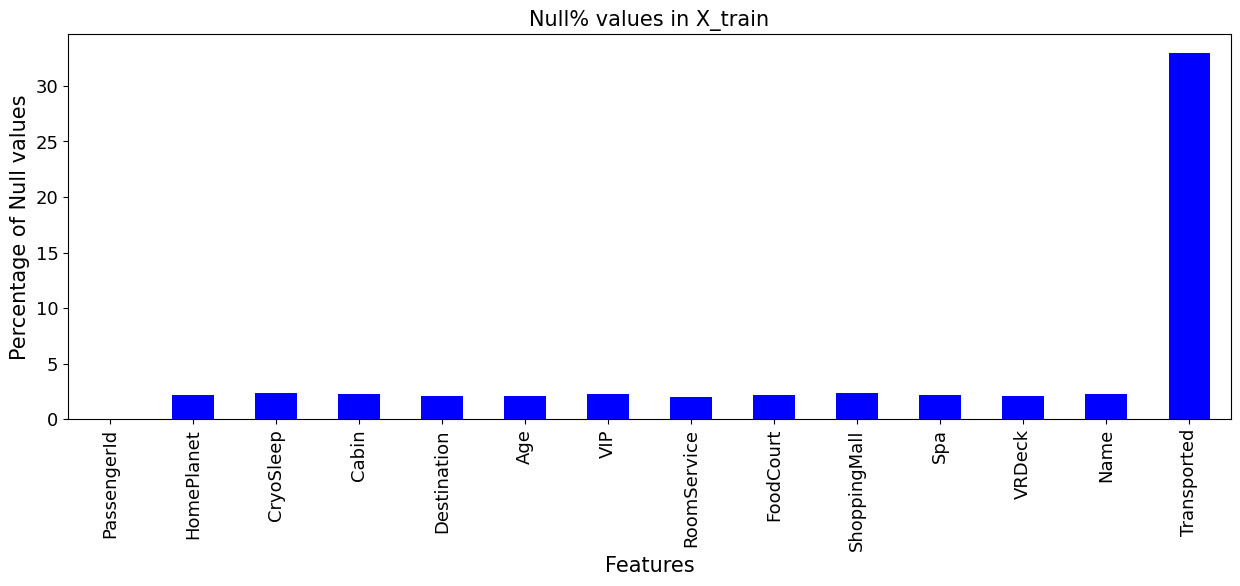

In [406]:
from matplotlib import pyplot as plt

# Histograma of Null% values of X_train
X_info['Null%'][:].plot(kind='bar', figsize=(15,5), color='blue', fontsize=13)
plt.title('Null% values in X_train', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of Null values', fontsize=15)

Another way to visualize percentage of null values for each feature, can be seen that around 2.2% of data is missing in each bar.

Text(345.72222222222223, 0.5, 'Index')

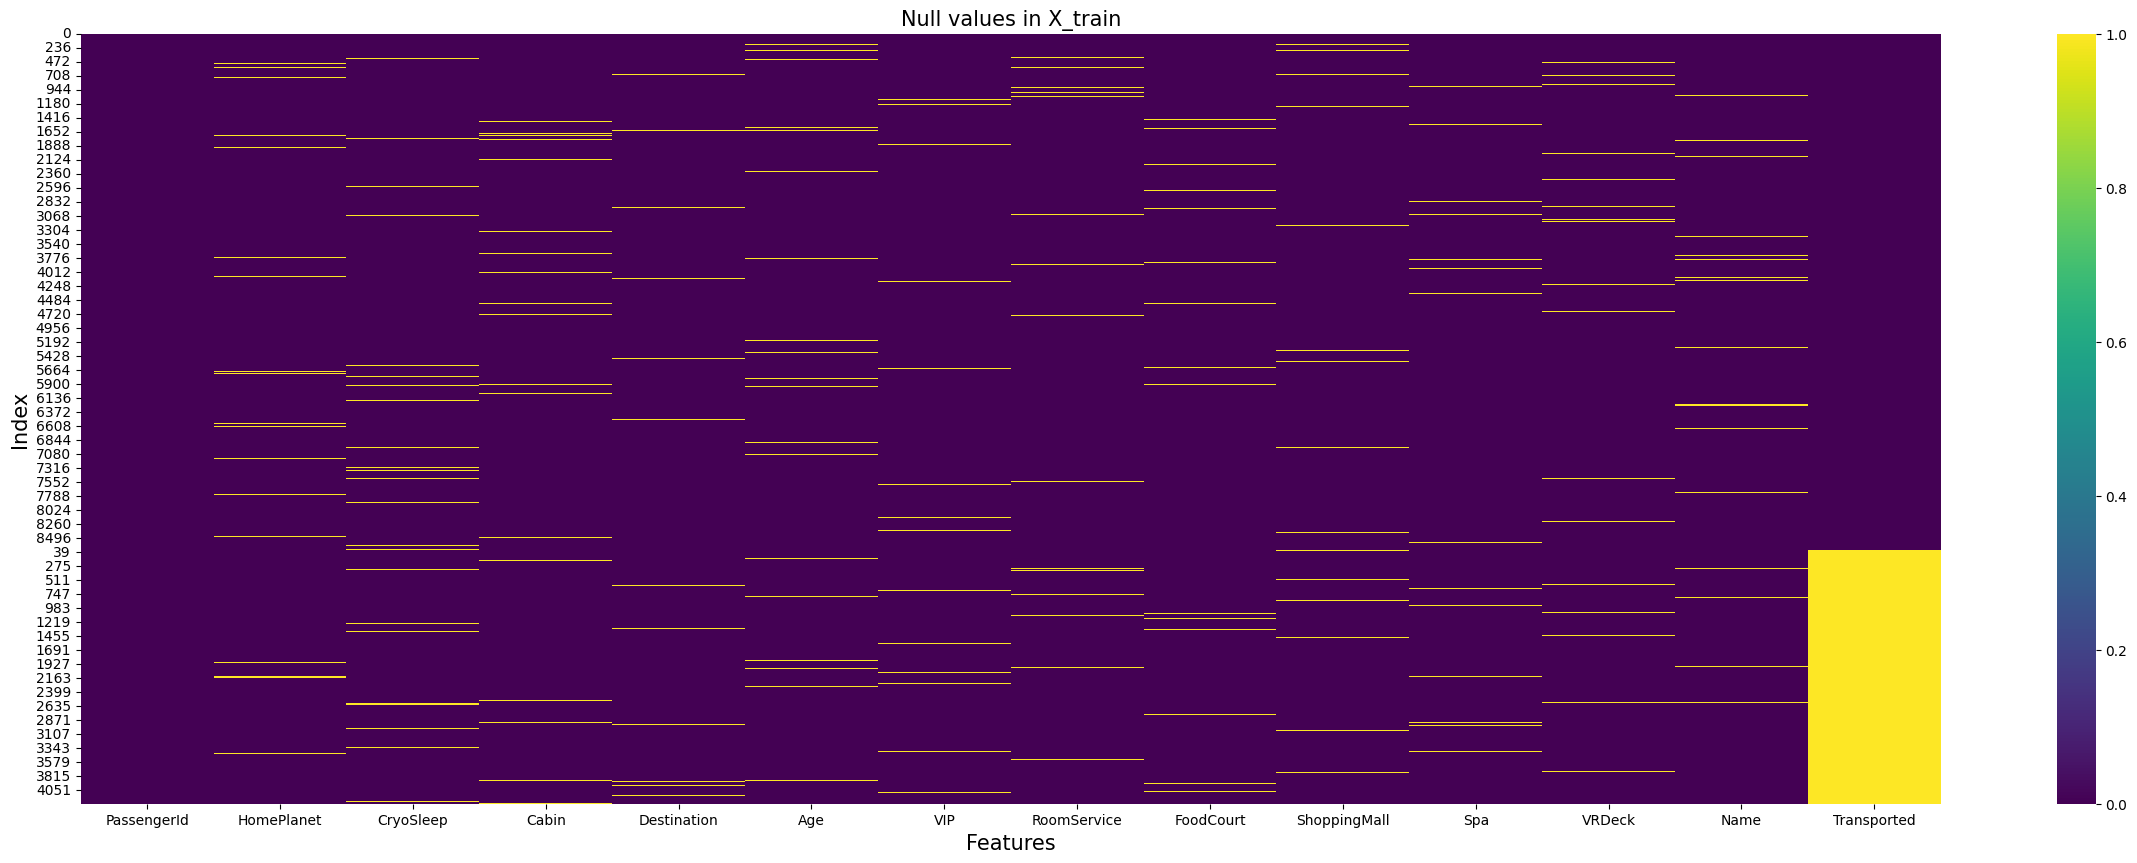

In [407]:
# Heat map of null values in X_train 
import seaborn as sns
plt.figure(figsize=(30,10))
sns.heatmap(X_train.isnull(), cmap='viridis')
plt.title('Null values in X_train', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Index', fontsize=15)



Seems that lost data is scattered 

(22.5, 24.5)

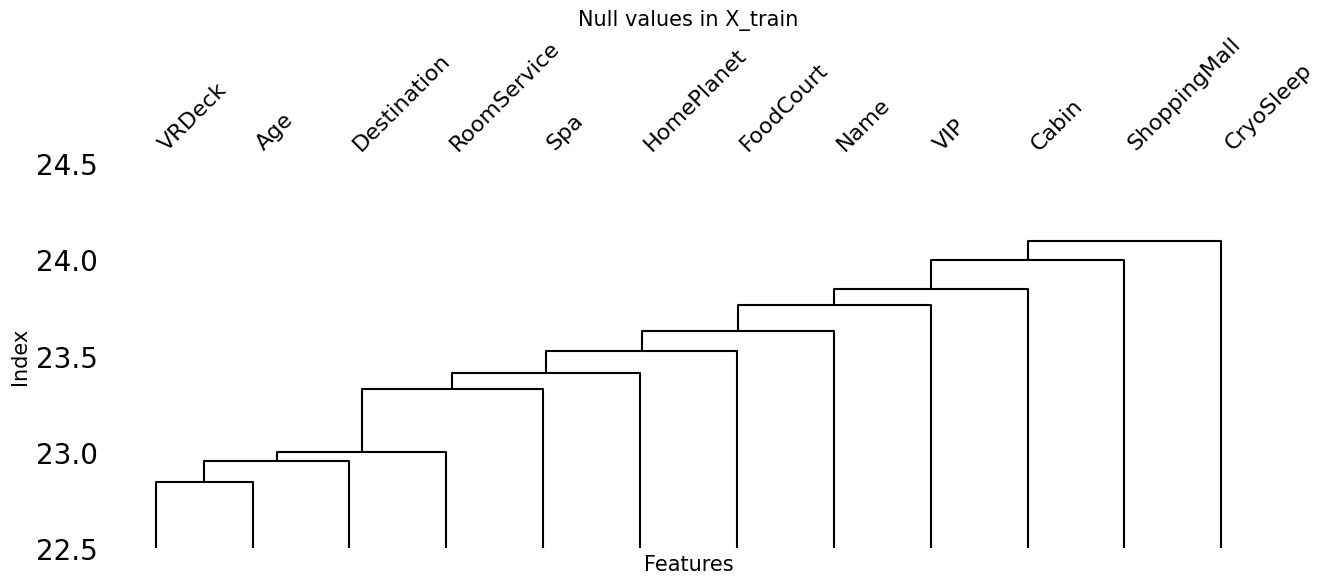

In [408]:
import missingno as msno

# Dendrograma de valores nulos en X_train desde la columna 2 hasta la penúltima
msno.dendrogram(X_train.iloc[:,1:-1], figsize=(15,5))
plt.title('Null values in X_train', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Index', fontsize=15)
plt.ylim([22.5, 24.5])

## 2.2. FEATURE RELATIONSHIP

Text(0.5, 1.0, 'Non Null Values vs Null Values in X_train')

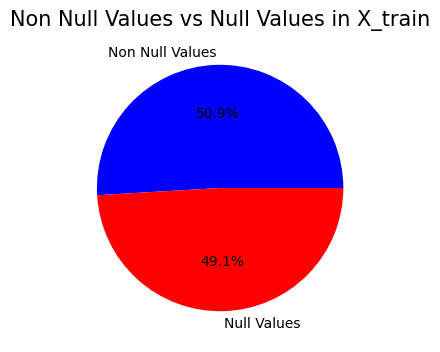

In [409]:
# Selection of observations with at least a null value
X_train_NV = pd.DataFrame(X_train[X_train.isnull().any(axis=1)])

# Selection of observations with no null value in any feature 
X_train_NNV = pd.DataFrame(X_train[X_train.isnull().any(axis=1)==False])

# Donut chart of observations with non null values in any feature vs observations with null values in any feature
plt.figure(figsize=(4,4))
plt.pie([X_train_NNV.shape[0], X_train_NV.shape[0]], labels=['Non Null Values', 'Null Values'], autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Non Null Values vs Null Values in X_train', fontsize=15)


In [410]:
# Table with information about categorical features in X_train
X_train.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,12970,12682,12660,12671,12696,12674,12676,8693
unique,12970,3,2,9825,3,2,12629,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Carry Contrevins,True
freq,1,6865,8079,8,8871,12401,2,4378


In [411]:
# Split PassengerId from X_train in 2 columns by separator '_'
X_train[['PassengerId', 'GroupID']] = X_train['PassengerId'].str.split('_', expand=True)

# Split Name from X_train in 2 columns by separator ' '
X_train[['Name', 'LastName']] = X_train['Name'].str.split(' ', expand=True)

In [412]:
# Split Cabin from X_train in 3 columns by separator '/'
X_train[['CabinC', 'CabinN', 'CabinS']] = X_train['Cabin'].str.split('/', expand=True)
X_train.drop(['Cabin'], axis=1, inplace=True)

In [413]:
X_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,LastName,CabinC,CabinN,CabinS
0,0001,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham,False,01,Ofracculy,B,0,P
1,0002,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna,True,01,Vines,F,0,S
2,0003,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark,False,01,Susent,A,0,S
3,0003,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam,False,02,Susent,A,0,S
4,0004,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy,True,01,Santantines,F,1,S
5,0005,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie,True,01,Hinetthews,F,0,P
6,0006,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex,True,01,Jacostaffey,F,2,S
7,0006,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra,True,02,Jacostaffey,G,0,S
8,0007,Earth,False,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona,True,01,Beston,F,3,S
9,0008,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam,True,01,Flatic,B,1,P


In [414]:
import pandas as pd

# PassengerId, CabinN and GroupID feature is converted to int for not NaN values
X_train['PassengerId'] = pd.to_numeric(X_train['PassengerId'])
X_train['CabinN'] = pd.to_numeric(X_train['CabinN'])
X_train['GroupID'] = pd.to_numeric(X_train['GroupID'])

X_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,LastName,CabinC,CabinN,CabinS
0,1,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham,False,1,Ofracculy,B,0.0,P
1,2,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna,True,1,Vines,F,0.0,S
2,3,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark,False,1,Susent,A,0.0,S
3,3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam,False,2,Susent,A,0.0,S
4,4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy,True,1,Santantines,F,1.0,S


In [415]:
# For bucle to make OHE of categorical features: HomePlanet,Destination and CabinC 
for i in ['HomePlanet', 'Destination', 'CabinC']:
    X_train[i] = X_train[i].astype('category')
    X_train = pd.concat([X_train, pd.get_dummies(X_train[i], prefix=i, dummy_na=True)], axis=1)
    X_train.drop([i], axis=1, inplace=True)

In [416]:
X_train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,LastName,CabinN,CabinS,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,CabinC_A,CabinC_B,CabinC_C,CabinC_D,CabinC_E,CabinC_F,CabinC_G,CabinC_T,CabinC_nan
0,1,False,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham,False,1,Ofracculy,0.0,P,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
1,2,False,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna,True,1,Vines,0.0,S,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
2,3,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark,False,1,Susent,0.0,S,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
3,3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam,False,2,Susent,0.0,S,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
4,4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy,True,1,Santantines,1.0,S,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False


In [417]:
# Change values in CabinS feature from S to 1 and P to 0
X_train['CabinS'] = X_train['CabinS'].replace(['S', 'P'], [1, 0])


# For columns in X_train with type 'object' or 'bool' and not Name or LastName, change it to int
for i in X_train.columns:
    if X_train[i].dtype == 'object' or X_train[i].dtype == 'bool':
        if i != 'Name' and i != 'LastName':
            X_train[i] = X_train[i].map({True: 1, False: 0})



In [418]:
X_train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,LastName,CabinN,CabinS,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,CabinC_A,CabinC_B,CabinC_C,CabinC_D,CabinC_E,CabinC_F,CabinC_G,CabinC_T,CabinC_nan
0,1,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham,0.0,1,Ofracculy,0.0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,2,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna,1.0,1,Vines,0.0,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark,0.0,1,Susent,0.0,1.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam,0.0,2,Susent,0.0,1.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy,1.0,1,Santantines,1.0,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [419]:
X_train_types = X_train.dtypes # Type of each feature
X_train_types

PassengerId                    int64
CryoSleep                    float64
Age                          float64
VIP                          float64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Name                          object
Transported                  float64
GroupID                        int64
LastName                      object
CabinN                       float64
CabinS                       float64
HomePlanet_Earth               int64
HomePlanet_Europa              int64
HomePlanet_Mars                int64
HomePlanet_nan                 int64
Destination_55 Cancri e        int64
Destination_PSO J318.5-22      int64
Destination_TRAPPIST-1e        int64
Destination_nan                int64
CabinC_A                       int64
CabinC_B                       int64
CabinC_C                       int64
CabinC_D                       int64
C

In [420]:
# Checking of null values quantity in each feature
X_train_null = X_train.isnull().sum()
X_train_null

PassengerId                     0
CryoSleep                     310
Age                           270
VIP                           296
RoomService                   263
FoodCourt                     289
ShoppingMall                  306
Spa                           284
VRDeck                        268
Name                          294
Transported                  4277
GroupID                         0
LastName                      294
CabinN                        299
CabinS                        299
HomePlanet_Earth                0
HomePlanet_Europa               0
HomePlanet_Mars                 0
HomePlanet_nan                  0
Destination_55 Cancri e         0
Destination_PSO J318.5-22       0
Destination_TRAPPIST-1e         0
Destination_nan                 0
CabinC_A                        0
CabinC_B                        0
CabinC_C                        0
CabinC_D                        0
CabinC_E                        0
CabinC_F                        0
CabinC_G      

Text(158.08159722222223, 0.5, 'Features')

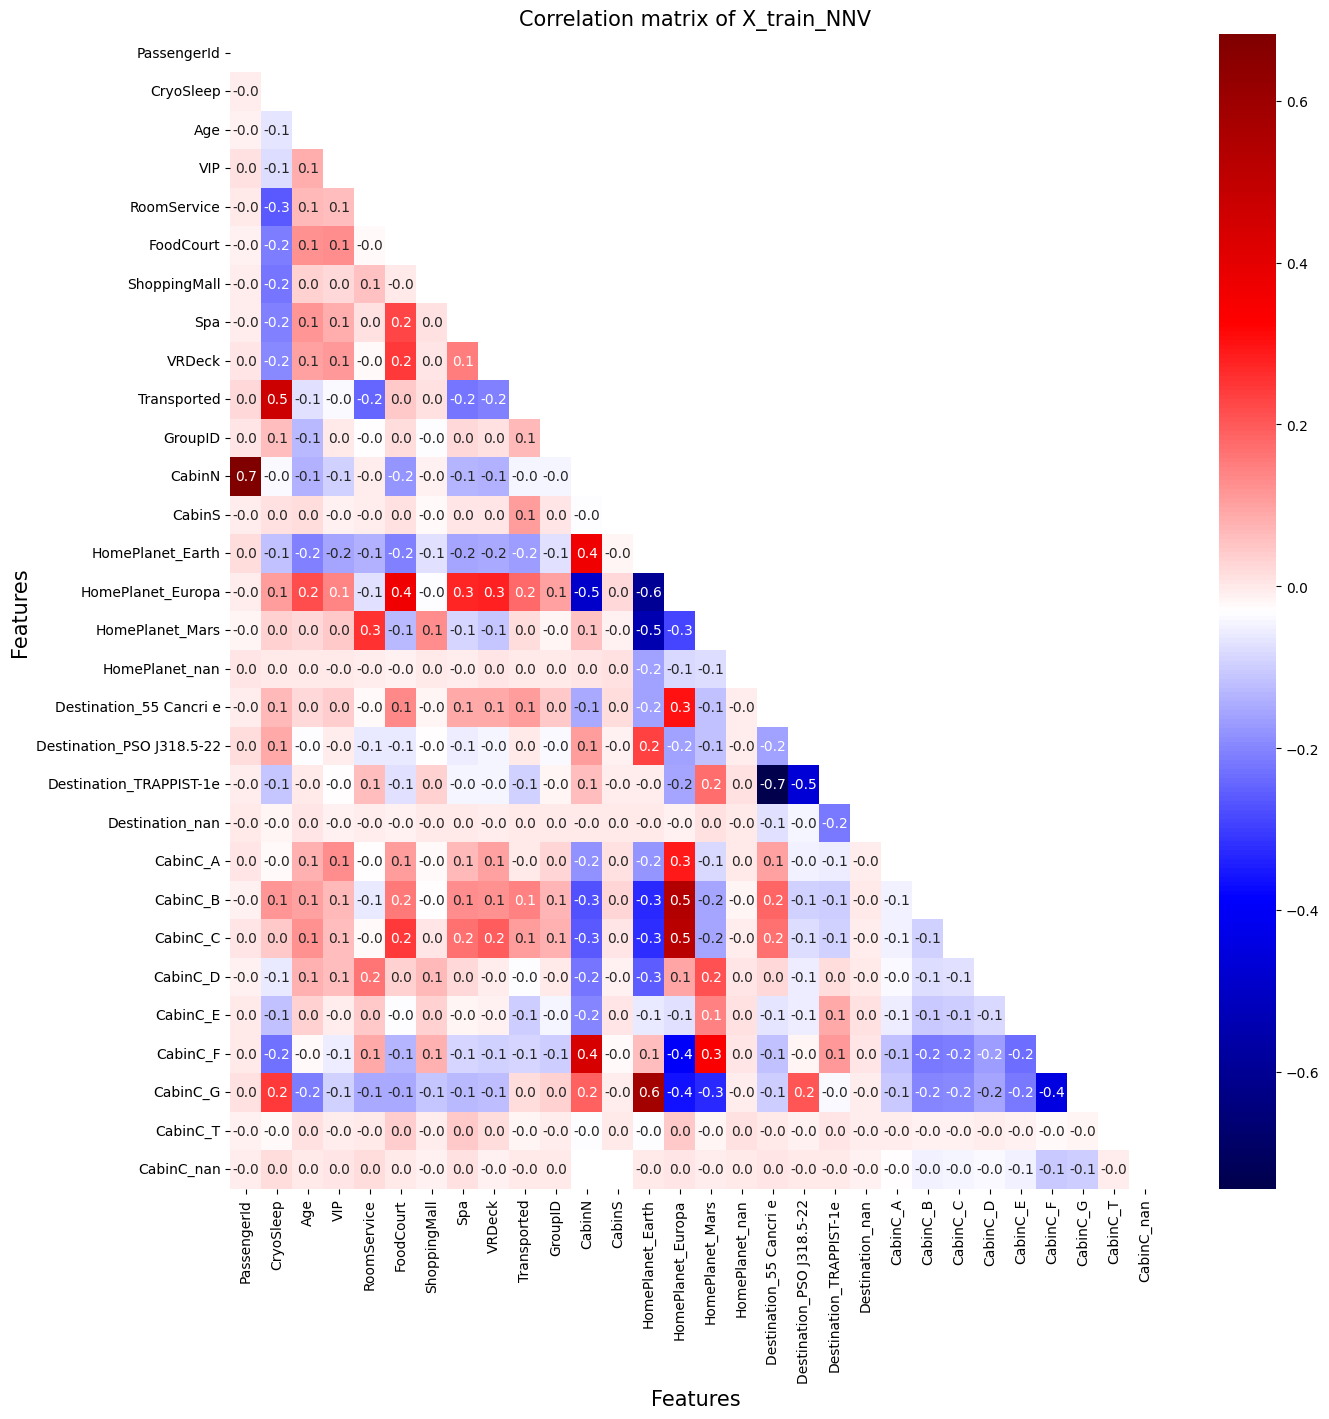

In [421]:
# Correlation matrix of X_train_NNV except 'LastName' and 'Name' features showing only the bottom triangle
plt.figure(figsize=(15,15))
corr_matrix = X_train.drop(['LastName', 'Name'],axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, cmap='seismic', mask=mask, annot=True, fmt=".1f")
plt.title('Correlation matrix of X_train_NNV', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features', fontsize=15)

## 2.3 Outliers

### IMPUTATION FON NULL VALUES

REGRESSION IMPUTATION

In [422]:
"""from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

columns = ['CryoSleep','Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinN','CabinS']    

# Selecciona las columnas que vamos a utilizar para imputar
# X_train_REG = X_train[columns]

# Inicializar el IterativeImputer
imp = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0)

# Aplicar el imputador a nuestro DataFrame
X_train_imputed = imp.fit_transform(X_train[columns])

# El resultado es un array numpy, así que lo convertimos a DataFrame para mejor visualización
X_train_REG = pd.DataFrame(X_train_imputed, columns=X_train[columns].columns)

Nulls = X_train_REG.isnull().sum() # Number of null values in each feature
Nulls.head(20)

"""




"from sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\nfrom sklearn.linear_model import LinearRegression\nimport numpy as np\nimport pandas as pd\n\ncolumns = ['CryoSleep','Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinN','CabinS']    \n\n# Selecciona las columnas que vamos a utilizar para imputar\n# X_train_REG = X_train[columns]\n\n# Inicializar el IterativeImputer\nimp = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0)\n\n# Aplicar el imputador a nuestro DataFrame\nX_train_imputed = imp.fit_transform(X_train[columns])\n\n# El resultado es un array numpy, así que lo convertimos a DataFrame para mejor visualización\nX_train_REG = pd.DataFrame(X_train_imputed, columns=X_train[columns].columns)\n\nNulls = X_train_REG.isnull().sum() # Number of null values in each feature\nNulls.head(20)\n\n"

# 4. DATA PREPROCESSING

### 2.1.1. HomePlanet feature
Lets take all HomePlanet null values

In [423]:
A = X_train.isnull().sum()
A



PassengerId                     0
CryoSleep                     310
Age                           270
VIP                           296
RoomService                   263
FoodCourt                     289
ShoppingMall                  306
Spa                           284
VRDeck                        268
Name                          294
Transported                  4277
GroupID                         0
LastName                      294
CabinN                        299
CabinS                        299
HomePlanet_Earth                0
HomePlanet_Europa               0
HomePlanet_Mars                 0
HomePlanet_nan                  0
Destination_55 Cancri e         0
Destination_PSO J318.5-22       0
Destination_TRAPPIST-1e         0
Destination_nan                 0
CabinC_A                        0
CabinC_B                        0
CabinC_C                        0
CabinC_D                        0
CabinC_E                        0
CabinC_F                        0
CabinC_G      

In [424]:
from sklearn.impute import SimpleImputer

MostFrequentImputer = SimpleImputer(strategy = 'most_frequent') # Create an instance of the imputer selecting the most frequent as strategy
MeanImputer = SimpleImputer(strategy = 'mean') # Create an instance of the imputer selecting the mean as strategy

X_train[['VIP']]=MostFrequentImputer.fit_transform(X_train[['VIP']])
X_train[['Age']]=MeanImputer.fit_transform(X_train[['Age']])
X_train[['VRDeck']]=MeanImputer.fit_transform(X_train[['VRDeck']])
X_train[['RoomService']]=MeanImputer.fit_transform(X_train[['RoomService']])
X_train[['FoodCourt']]=MeanImputer.fit_transform(X_train[['FoodCourt']])
X_train[['ShoppingMall']]=MeanImputer.fit_transform(X_train[['ShoppingMall']])
X_train[['Spa']]=MeanImputer.fit_transform(X_train[['Spa']])
X_train[['CabinN']]=MeanImputer.fit_transform(X_train[['Spa']])
X_train[['CabinS']]=MeanImputer.fit_transform(X_train[['Spa']])


X_train['Name']=X_train['Name'].fillna(0)
X_train['LastName']=X_train['Name'].fillna(0)


X_train.isnull().sum()

PassengerId                     0
CryoSleep                     310
Age                             0
VIP                             0
RoomService                     0
FoodCourt                       0
ShoppingMall                    0
Spa                             0
VRDeck                          0
Name                            0
Transported                  4277
GroupID                         0
LastName                        0
CabinN                          0
CabinS                          0
HomePlanet_Earth                0
HomePlanet_Europa               0
HomePlanet_Mars                 0
HomePlanet_nan                  0
Destination_55 Cancri e         0
Destination_PSO J318.5-22       0
Destination_TRAPPIST-1e         0
Destination_nan                 0
CabinC_A                        0
CabinC_B                        0
CabinC_C                        0
CabinC_D                        0
CabinC_E                        0
CabinC_F                        0
CabinC_G      

Splitting Cabin feature

In [425]:
X_train.head(10)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,LastName,CabinN,CabinS,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,CabinC_A,CabinC_B,CabinC_C,CabinC_D,CabinC_E,CabinC_F,CabinC_G,CabinC_T,CabinC_nan
0,1,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.000000,Maham,0.0,1,Maham,0.0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,2,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.000000,Juanna,1.0,1,Juanna,549.0,549.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.000000,Altark,0.0,1,Altark,6715.0,6715.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.000000,Solam,0.0,2,Solam,3329.0,3329.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.000000,Willy,1.0,1,Willy,565.0,565.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5,5,0.0,44.0,0.0,0.0,483.0,0.0,291.0,0.000000,Sandie,1.0,1,Sandie,291.0,291.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
6,6,0.0,26.0,0.0,42.0,1539.0,3.0,0.0,0.000000,Billex,1.0,1,Billex,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7,6,1.0,28.0,0.0,0.0,0.0,0.0,0.0,306.789482,Candra,1.0,2,Candra,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8,7,0.0,35.0,0.0,0.0,785.0,17.0,216.0,0.000000,Andona,1.0,1,Andona,216.0,216.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9,8,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.000000,Erraiam,1.0,1,Erraiam,0.0,0.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [426]:
X_train.dtypes

PassengerId                    int64
CryoSleep                    float64
Age                          float64
VIP                          float64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Name                          object
Transported                  float64
GroupID                        int64
LastName                      object
CabinN                       float64
CabinS                       float64
HomePlanet_Earth               int64
HomePlanet_Europa              int64
HomePlanet_Mars                int64
HomePlanet_nan                 int64
Destination_55 Cancri e        int64
Destination_PSO J318.5-22      int64
Destination_TRAPPIST-1e        int64
Destination_nan                int64
CabinC_A                       int64
CabinC_B                       int64
CabinC_C                       int64
CabinC_D                       int64
C

## 4.3 - Feature engineering

### 4.3.1 TOTAL WASTED FEATURE

In [427]:
X_train['TotalWasted']= X_train['RoomService']+X_train['FoodCourt']+X_train['ShoppingMall']+X_train['Spa']+X_train['VRDeck']
X_train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,LastName,CabinN,CabinS,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,CabinC_A,CabinC_B,CabinC_C,CabinC_D,CabinC_E,CabinC_F,CabinC_G,CabinC_T,CabinC_nan,TotalWasted
0,1,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham,0.0,1,Maham,0.0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0
1,2,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna,1.0,1,Juanna,549.0,549.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,736.0
2,3,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark,0.0,1,Altark,6715.0,6715.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,10383.0
3,3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam,0.0,2,Solam,3329.0,3329.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,5176.0
4,4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy,1.0,1,Willy,565.0,565.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1091.0


### 4.3.2 BINARY WASTED FEATURE

In [428]:
X_train['Wasted']=X_train['TotalWasted'].map(lambda x: 1 if x>0 else 0)
X_train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,LastName,CabinN,CabinS,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,CabinC_A,CabinC_B,CabinC_C,CabinC_D,CabinC_E,CabinC_F,CabinC_G,CabinC_T,CabinC_nan,TotalWasted,Wasted
0,1,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham,0.0,1,Maham,0.0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0,0
1,2,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna,1.0,1,Juanna,549.0,549.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,736.0,1
2,3,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark,0.0,1,Altark,6715.0,6715.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,10383.0,1
3,3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam,0.0,2,Solam,3329.0,3329.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,5176.0,1
4,4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy,1.0,1,Willy,565.0,565.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1091.0,1


### 2.5.2 - New features as intervals of age

In [429]:
def func(x):
    if x <= 12:
        return 1
    elif (x>12) & (x<=60):
        return 2
    else:
        return 3

    
X_train['AgeGroup']=X_train['Age'].apply(func)
X_train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,LastName,CabinN,CabinS,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,CabinC_A,CabinC_B,CabinC_C,CabinC_D,CabinC_E,CabinC_F,CabinC_G,CabinC_T,CabinC_nan,TotalWasted,Wasted,AgeGroup
0,1,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham,0.0,1,Maham,0.0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0,0,2
1,2,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna,1.0,1,Juanna,549.0,549.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,736.0,1,2
2,3,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark,0.0,1,Altark,6715.0,6715.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,10383.0,1,2
3,3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam,0.0,2,Solam,3329.0,3329.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,5176.0,1,2
4,4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy,1.0,1,Willy,565.0,565.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1091.0,1,2


In [430]:
X_train['CryoSleep']=X_train['CryoSleep'].fillna(X_train['Wasted'].map(lambda x: True if x<1 else False))
X_train['CryoSleep'] = X_train['CryoSleep'].astype(bool).astype(int)
X_train.head(5)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,LastName,CabinN,CabinS,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,CabinC_A,CabinC_B,CabinC_C,CabinC_D,CabinC_E,CabinC_F,CabinC_G,CabinC_T,CabinC_nan,TotalWasted,Wasted,AgeGroup
0,1,0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham,0.0,1,Maham,0.0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0,0,2
1,2,0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna,1.0,1,Juanna,549.0,549.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,736.0,1,2
2,3,0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark,0.0,1,Altark,6715.0,6715.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,10383.0,1,2
3,3,0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam,0.0,2,Solam,3329.0,3329.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,5176.0,1,2
4,4,0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy,1.0,1,Willy,565.0,565.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1091.0,1,2


# 5. MODELLING

## 5.1. DATA PREPARATION

In [431]:
X_train = X_train.drop(['Name', 'LastName'], axis=1)

In [432]:
X_train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupID,CabinN,CabinS,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,CabinC_A,CabinC_B,CabinC_C,CabinC_D,CabinC_E,CabinC_F,CabinC_G,CabinC_T,CabinC_nan,TotalWasted,Wasted,AgeGroup
0,1,0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0,0,2
1,2,0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,1,549.0,549.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,736.0,1,2
2,3,0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,1,6715.0,6715.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,10383.0,1,2
3,3,0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,2,3329.0,3329.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,5176.0,1,2
4,4,0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,1,565.0,565.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1091.0,1,2


In [433]:
X_trainPrev = X_train

# Selecciona las observaciones que no tienen NaN en "Transported"
X_train = X_trainPrev[X_trainPrev['Transported'].notna()]
y_train = X_train['Transported']
# Selecciona las observaciones que tienen NaN en "Transported"
X_test = X_trainPrev[X_trainPrev['Transported'].isna()]

X_train = X_train.drop(['PassengerId','Transported'], axis=1)
X_test = X_test.drop(['PassengerId','Transported'], axis=1)

X_trainF = X_train
y_trainF = y_train

In [434]:
# Print Shape of X_trainF, y_trainF and X_test
print('Shape of X_trainF: ', X_trainF.shape)
print('Shape of y_trainF: ', y_trainF.shape)
print('Shape of X_test: ', X_test.shape)

Shape of X_trainF:  (8693, 31)
Shape of y_trainF:  (8693,)
Shape of X_test:  (4277, 31)


## 5.2. MODELLING PHASE

In [446]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

# Espacio de hiperparámetros
space = {
    'num_leaves': hp.quniform('num_leaves', 20, 70, 3), 
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, -2),
    'n_estimators': hp.quniform('n_estimators', 200, 600, 5),
    'min_child_samples': hp.quniform('min_child_samples', 10, 60, 1),
    'subsample': hp.quniform('subsample', 0.3, 0.7, 0.05), 
    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05), 
    'max_bin': hp.quniform('max_bin', 100, 2000, 10),
    'boosting_type': 'dart',
    'objective': 'binary',
    'metric': 'binary_logloss'
    }

# Función objetivo
def objective(params):
    
    params['num_leaves'] = int(params['num_leaves'])
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    params['min_child_samples'] = int(params['min_child_samples'])
    params['max_bin'] = int(params['max_bin'])

    model = LGBMClassifier(**params)
    score = cross_val_score(model, X_trainF, y_trainF, cv=5, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}
# Optimización
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
print(best)

 38%|███▊      | 19/50 [03:51<06:17, 12.19s/trial, best loss: -0.8001868063004609]


KeyboardInterrupt: 

In [444]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_trainF, y_trainF , random_state=123, train_size=0.8)

# Ajustar el modelo con los mejores hiperparámetros encontrados
best_model = LGBMClassifier(
    num_leaves = int(best['num_leaves']),
    max_depth = int(best['max_depth']),
    learning_rate = best['learning_rate'],
    n_estimators = int(best['n_estimators']),
    min_child_samples = int(best['min_child_samples']),
    subsample = best['subsample'],
    colsample_bytree = best['colsample_bytree'],
    objective = 'regression',
    max_bin = int(best['max_bin'])
    )

best_model.fit(X_trainF, y_trainF)

accuracy = accuracy_score(y_val, best_model.predict(X_val).astype(bool))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Hacer predicciones en el conjunto de validación
y_pred = best_model.predict(X_test).astype(bool)


Accuracy: 86.49%


In [435]:
# sklearn tools and models
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# LGBM
import lightgbm as lgbm

X_train, X_val, y_train, y_val = train_test_split(X_trainF, y_trainF , random_state=123, train_size=0.8)

lgbm_model = lgbm.LGBMClassifier(objective = 'binary',
 boosting_type = 'dart',
 learning_rate = 0.09,
 num_leaves = 9,
 max_depth = 10,
 n_estimators = 515,
 reg_alpha = 0.37,
 reg_lambda = 0.96,
 min_child_samples= 11)

lgbm_model.fit(X_train, y_train)

pred = lgbm_model.predict(X_val)

accuracy = accuracy_score(y_val, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.74%


In [436]:
""""y_pred = lgbm_model.predict(X_test).astype(bool)""""

In [445]:
output = pd.DataFrame({'PassengerID': dataTest['PassengerId'],
                       'Transported': y_pred})
output.to_csv('submission.csv', index=False) 